Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

### EXERCÍCIO 01

In [37]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

digits = datasets.load_digits()
pd = datasets.load_digits()
print(f'Conteudo de Digits: {digits.keys()}')

Conteudo de Digits: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


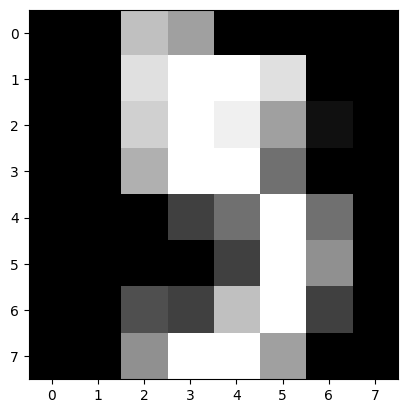

In [38]:
plt.gray()
plt.imshow(digits.images[5])
plt.show()

In [39]:
X_digits = digits.data
y_digits = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

In [40]:
print(f'Tamanho de training dataset: {X_train.shape}, {y_train.shape}')
print(f'Tamanho de testing dataset: {X_test.shape}, {y_test.shape}')

Tamanho de training dataset: (1437, 64), (1437,)
Tamanho de testing dataset: (360, 64), (360,)


In [41]:
def grid_search(param_grid,classifier):
    grid_cv = GridSearchCV(classifier(random_state=101),param_grid,verbose=3)
    grid_cv.fit(X_train,y_train)
    return grid_cv.best_params_, grid_cv.best_score_



In [47]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[None,2,4,8,12,16,20,24,28,32,36,40,90,120,150],"min_samples_leaf":[1,2,3,4,5], "min_samples_split":[2,3,4,5]}
grid_search(param_grid,DecisionTreeClassifier)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.865 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.851 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.864 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.861 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3;, score=0.851 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3;, score=0.844 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3;, score=0.815 total time=

({'criterion': 'entropy',
  'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 2},
 np.float64(0.8517953929539296))

In [48]:
# Executando com os params escolhidos
clf = DecisionTreeClassifier(random_state=42, max_depth=None,criterion='entropy',min_samples_leaf=2,min_samples_split=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Precisao: {clf.score(X_test, y_test)}')

Precisao: 0.8833333333333333


In [50]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.71      0.89      0.79        28
           2       0.82      0.85      0.84        33
           3       0.88      0.85      0.87        34
           4       0.91      0.91      0.91        46
           5       0.98      0.94      0.96        47
           6       0.97      0.91      0.94        35
           7       0.91      0.85      0.88        34
           8       0.76      0.83      0.79        30
           9       0.89      0.82      0.86        40

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.88       360
weighted avg       0.89      0.88      0.88       360



In [51]:
print(confusion_matrix(y_test, y_pred))

[[31  0  0  0  1  0  0  1  0  0]
 [ 0 25  1  0  0  0  0  0  0  2]
 [ 0  1 28  1  0  0  0  1  2  0]
 [ 0  1  2 29  0  0  0  0  1  1]
 [ 0  2  0  0 42  0  0  0  2  0]
 [ 0  1  0  0  0 44  1  0  1  0]
 [ 1  0  0  0  1  0 32  0  1  0]
 [ 0  2  2  0  0  0  0 29  0  1]
 [ 0  0  1  3  0  1  0  0 25  0]
 [ 0  3  0  0  2  0  0  1  1 33]]


### EXERCÍCIO 02

In [97]:
import xgboost as xgb

# isolando features de novo
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(random_state=42,max_depth=5)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)


In [98]:
print("Precisão:", xgb_model.score(X_test, y_test))


Precisão: 0.8638138175010681


In [111]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1, random_state = 42,max_depth=20)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=1, random_state=42)

In [112]:
predictions = rf.predict(X_test)
print("Precisão:", rf.score(X_test, y_test))



Precisão: 0.4242796253362514


In [120]:
# fazer com gridsearchCV --> melhor metodo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,1000], 'max_depth':[10,20,30,40,50,60,70,80,90,100]}
grid_cv = GridSearchCV(RandomForestClassifier(random_state=101),param_grid,verbose=3)

grid_cv.fit(X_train,y_train)

# plist = {}
# for i in range(1,10000,1000): 
#     rf = RandomForestRegressor(n_estimators = i, random_state = 42,max_depth=20)
#     rf.fit(X_train, y_train)
#     predictions = rf.predict(X_test)
#     plist[i] = (rf.score(X_test, y_test))
# best_param = max(plist, key=plist.get, default=None)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ....max_depth=10, n_estimators=100;, score=0.979 total time=   0.3s
[CV 2/5] END ....max_depth=10, n_estimators=100;, score=0.976 total time=   0.4s
[CV 3/5] END ....max_depth=10, n_estimators=100;, score=0.955 total time=   0.2s
[CV 4/5] END ....max_depth=10, n_estimators=100;, score=0.990 total time=   0.2s
[CV 5/5] END ....max_depth=10, n_estimators=100;, score=0.969 total time=   0.2s
[CV 1/5] END ....max_depth=10, n_estimators=200;, score=0.983 total time=   0.5s
[CV 2/5] END ....max_depth=10, n_estimators=200;, score=0.972 total time=   0.5s
[CV 3/5] END ....max_depth=10, n_estimators=200;, score=0.962 total time=   0.6s
[CV 4/5] END ....max_depth=10, n_estimators=200;, score=0.993 total time=   0.5s
[CV 5/5] END ....max_depth=10, n_estimators=200;, score=0.965 total time=   0.5s
[CV 1/5] END ....max_depth=10, n_estimators=300;, score=0.986 total time=   0.8s
[CV 2/5] END ....max_depth=10, n_estimators=300

KeyboardInterrupt: 

In [118]:
print(grid_cv.best_params_)

{'n_estimators': 600}


In [119]:
rf = RandomForestRegressor(n_estimators = 600, random_state = 42,max_depth=20)
# Train the model on training data
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("Precisão:", rf.score(X_test, y_test))

Precisão: 0.8321835870348043


In [ ]:
############# INFOS #############
# persistir modelo em pickle
# carregar modelo em api
# construir o dockerfile com base no ja feito, com endpoints dentro
### arquivo main - onde esta a aplicacao
# requisicao do cliente - python ou curl --> enviar imgs que estao no repo por meio de curl ou python requests